In [53]:
import pandas as pd
import numpy as np

In [54]:
#Connect to database

import mysql.connector
import time
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="password",
  database="valorant_tracker"
)
cursor = mydb.cursor() 

In [55]:
df = pd.read_sql("SELECT * FROM stats", mydb)
print("Number of samples: " + str(df.shape[0]))

Number of samples: 2380703


In [56]:
df['user_id'] = df['match_player_id'].str[36:]


In [57]:
print(df.columns)

Index(['match_player_id', 'rounds', 'date', 'result', 'map', 'smurf', 'agent',
       'kills', 'headshots', 'deaths', 'assists', 'damage', 'damage_received',
       'econ_rating', 'plants', 'defuses', 'first_bloods', 'grenade_casts',
       'ability_2_casts', 'ability_1_casts', 'ultimate_casts', 'placement',
       'kdratio', 'headshot_percentage', 'first_deaths', 'last_deaths',
       'current_rank', 'user_id'],
      dtype='object')


In [58]:
data = df.drop(["match_player_id", 
"user_id", 
"date", 
"rounds", 
"map", 
"result", 
"agent",
"smurf",
"current_rank",], axis=1)

#Should eventually take into account ability casts for each agent
data = data.drop(["grenade_casts",
"ability_2_casts",
"ability_1_casts",
"ultimate_casts"
], axis=1)


Working with the raw data is difficult since it is not very gaussian. Will instead average all stats and work with a dataset of users.

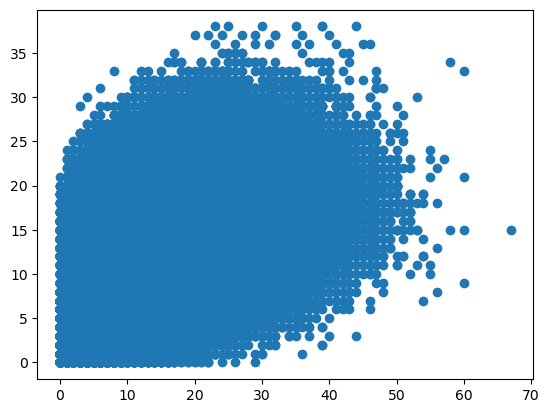

In [59]:
import matplotlib.pyplot as plt

plt.scatter(df["kills"], df["deaths"])

No validation set or test set being used to find optimal epsilon (should consider doing that, however, 0.000001 seems to work fairly well). After checking the accounts below, some of them appear to have two different users. One plays extremely well and the other plays poorly.

In [60]:
sub_data = df[["kills", "deaths", "user_id"]]
avg_data = sub_data.groupby("user_id").mean()


In [61]:
from sklearn.ensemble import IsolationForest

isof = IsolationForest(n_estimators=500, max_samples='auto', contamination=float(0.006))
clf = isof.fit(avg_data)

In [62]:
anomaly = clf.predict(avg_data)

In [63]:
test_anomaly = avg_data
test_anomaly["anomaly"] = anomaly.tolist()


In [64]:
anomalies = test_anomaly[(test_anomaly["anomaly"] == -1)]

In [65]:
anomalies.shape[0]

52

In [66]:
anom_true = anomalies[(anomalies["anomaly"] == -1)]

Text(0.5, 1.0, 'Kills Vs Deaths Outliers')

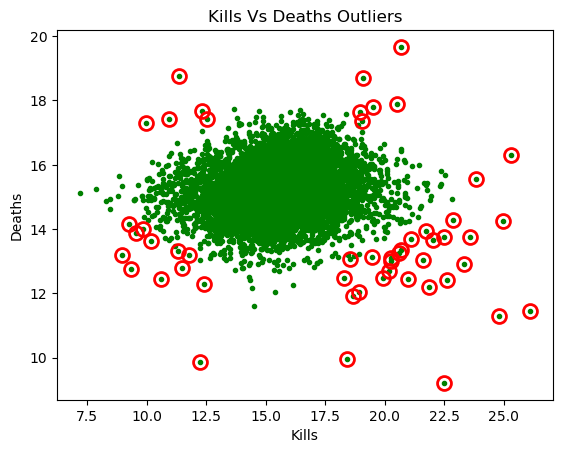

In [67]:
plt.plot(avg_data["kills"], avg_data["deaths"], 'g.')

plt.plot(anom_true["kills"].to_numpy(), anom_true["deaths"].to_numpy(), 'or',
         markersize= 10,markerfacecolor='none', markeredgewidth=2)
plt.xlabel("Kills")
plt.ylabel("Deaths")
plt.title("Kills Vs Deaths Outliers")

In [68]:
anom_true

,kills,deaths,anomaly
user_id,,,
2006 Ford F250#beep,9.333333,12.769231,-1
2321#00000,20.263158,13.105263,-1
AdanNoAim7#6969,18.950000,17.650000,-1
Angelas duo#0000,22.606061,12.424242,-1
Billy#Bob,18.394231,9.971154,-1
Blade#3091,11.350000,18.750000,-1
Cringe#1578,12.217949,9.858974,-1
Cwammycwam79#nerds,21.850000,12.200000,-1
EBoy#3690,22.500000,9.214286,-1


In [69]:
high_dim_data = df.drop(["match_player_id", 
"date", 
"rounds", 
"map", 
"result", 
"agent",
"smurf",
"current_rank",
"grenade_casts",
"ability_2_casts",
"ability_1_casts",
"ultimate_casts",], axis=1)


In [70]:
avg_high_dim_data = high_dim_data.groupby("user_id").mean()
avg_high_dim_data.head()

,kills,headshots,deaths,assists,damage,damage_received,econ_rating,plants,defuses,first_bloods,placement,kdratio,headshot_percentage,first_deaths,last_deaths
user_id,,,,,,,,,,,,,,,
000#Angel,16.066667,10.460000,14.663333,4.263333,3035.400000,2860.116667,65.773333,0.496667,0.380000,2.316667,5.196667,1.283333,24.110006,1.960000,2.200000
007#0101,16.590000,11.713333,16.253333,3.313333,3047.990000,3089.820000,57.020000,0.436667,0.296667,3.143333,5.050000,1.120000,29.801248,2.993333,1.650000
00Slade#NA1,15.993333,10.493333,14.430000,6.536667,3024.140000,2734.270000,58.663333,1.700000,0.403333,1.833333,5.023333,1.226667,21.784829,1.583333,2.483333
01000101#NA1,14.596667,9.233333,15.190000,5.790000,2785.880000,2926.673333,54.876667,2.526667,0.390000,1.400000,6.306667,1.066667,24.125524,1.336667,2.190000
0ClF#519,15.400000,10.000000,14.930000,4.816667,2872.456667,2831.420000,55.220000,1.426667,0.450000,1.850000,5.770000,1.170000,25.912547,1.900000,2.430000


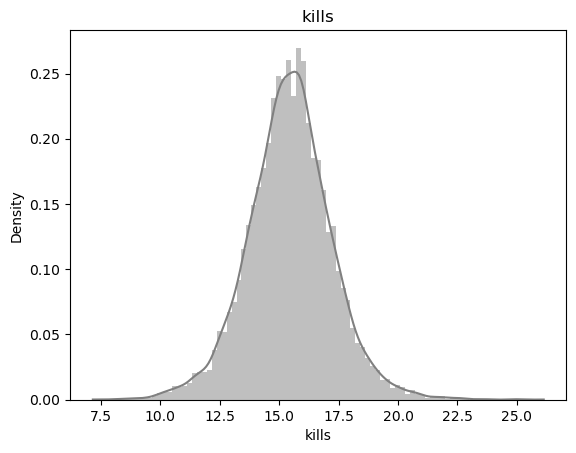

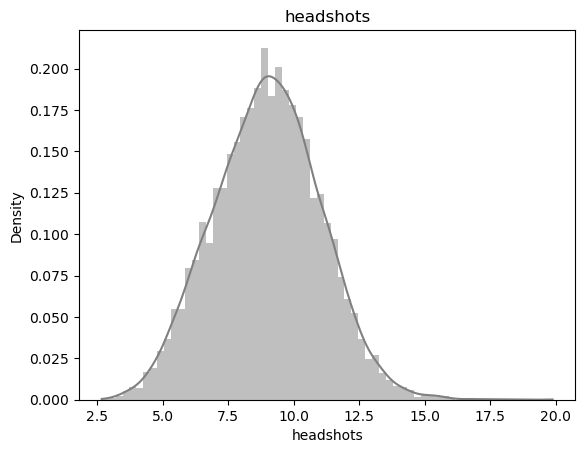

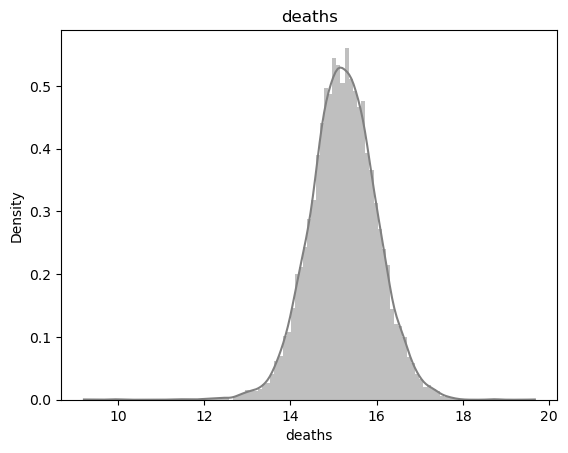

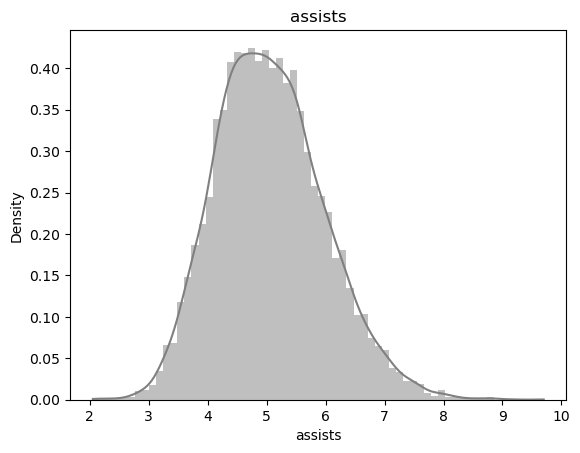

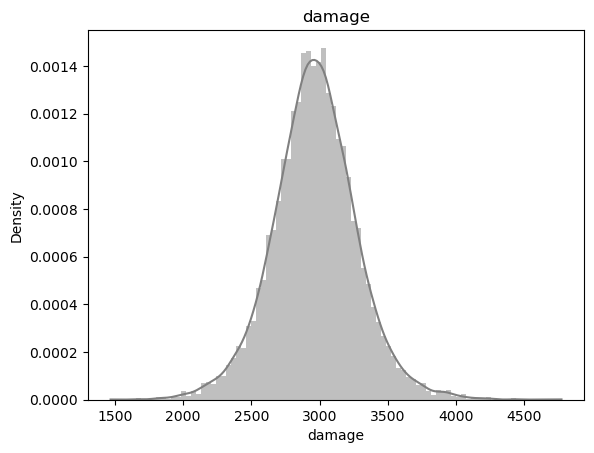

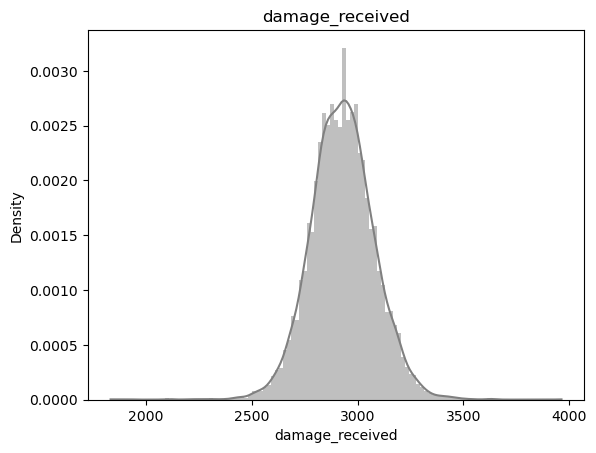

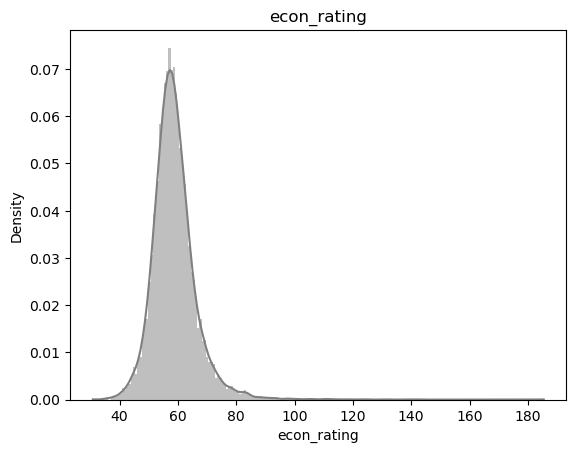

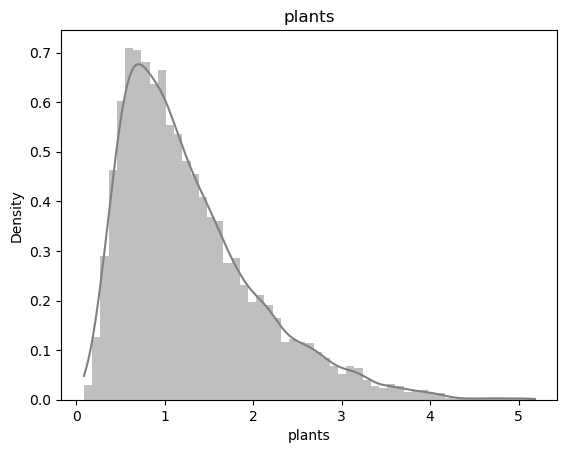

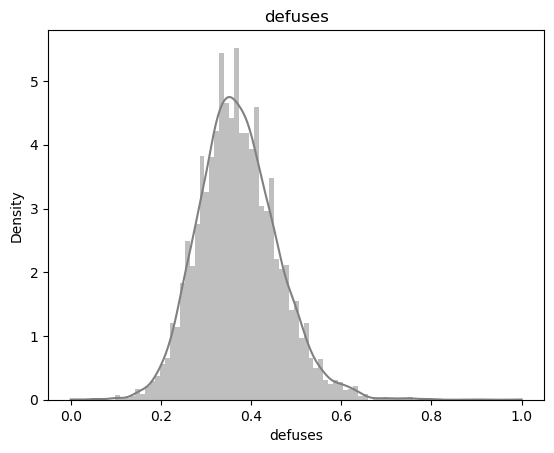

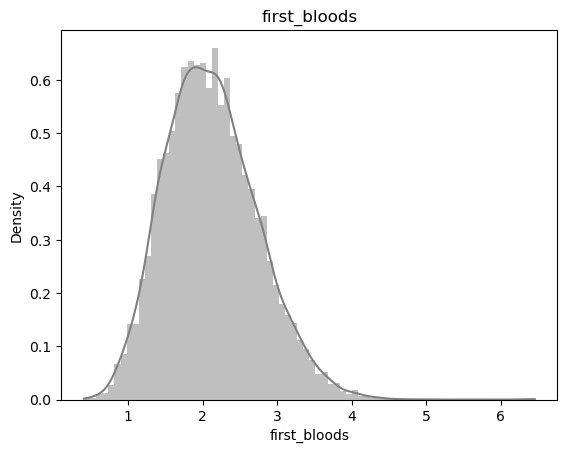

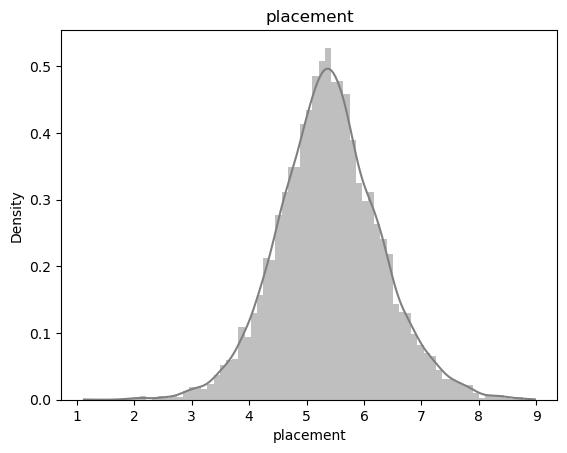

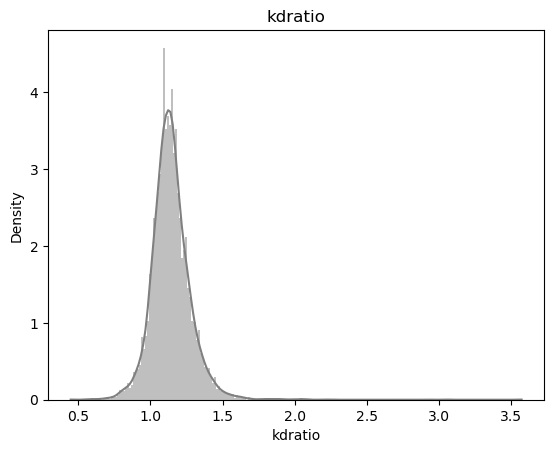

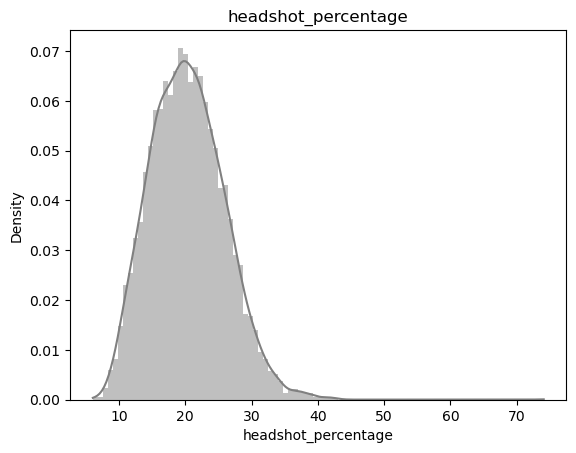

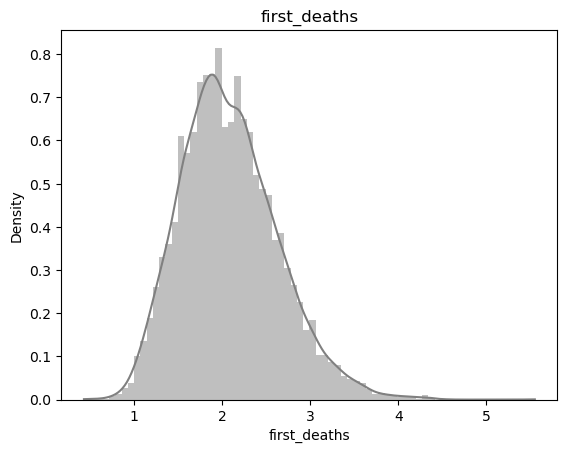

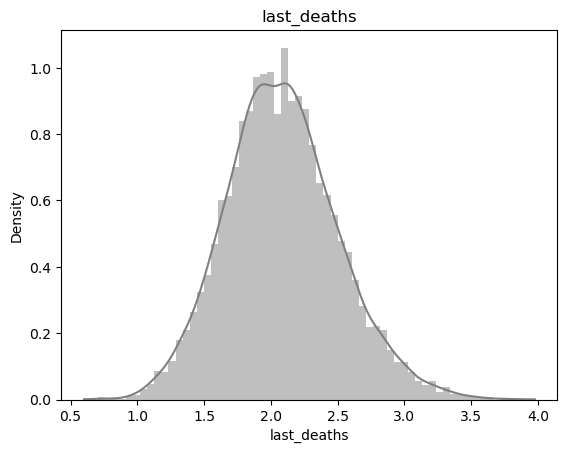

In [71]:
import seaborn as sns
for col in avg_high_dim_data:
    sns.histplot(avg_high_dim_data[col], color="grey", label="100% Equities", kde=True, stat="density", linewidth=0)
    plt.title(col)
    plt.show()

In [72]:
from sklearn.ensemble import IsolationForest

isof = IsolationForest(n_estimators=500, max_samples='auto', contamination=float(0.006))
clf = isof.fit(avg_high_dim_data)

In [73]:
anomaly_high_dim = clf.predict(avg_high_dim_data)

In [74]:
test_anomaly_high_dim = avg_high_dim_data
test_anomaly_high_dim["anomaly"] = anomaly_high_dim.tolist()
anomalies_high_dim = test_anomaly_high_dim[(test_anomaly_high_dim["anomaly"] == -1)]
print("Anomalies flagged: " + str(anomalies_high_dim.shape[0]))
anom_true_high_dim = anomalies_high_dim[(anomalies_high_dim["anomaly"] == -1)]
anom_true_high_dim

Anomalies flagged: 52


,kills,headshots,deaths,assists,damage,damage_received,econ_rating,plants,defuses,first_bloods,placement,kdratio,headshot_percentage,first_deaths,last_deaths,anomaly
user_id,,,,,,,,,,,,,,,,
2006 Ford F250#beep,9.333333,3.743590,12.769231,4.179487,1778.897436,2298.179487,47.307692,1.512821,0.256410,1.897436,7.846154,0.692308,11.278079,1.743590,1.230769,-1
444#bunny,20.865079,14.047619,15.047619,3.888889,3924.023810,2991.714286,90.063492,0.690476,0.293651,3.896825,3.095238,1.611111,27.017930,2.412698,1.317460,-1
Angelas duo#0000,22.606061,15.515152,12.424242,4.484848,4258.272727,2559.848485,124.727273,0.606061,0.272727,4.090909,2.090909,1.757576,26.198937,1.727273,1.363636,-1
Blade#3091,11.350000,4.500000,18.750000,4.850000,2400.550000,3430.750000,44.300000,0.300000,0.300000,2.550000,7.300000,0.550000,10.087577,5.550000,1.150000,-1
BlasiaN#MAMBA,20.657895,13.763158,14.184211,5.289474,3821.815789,2860.157895,77.578947,3.868421,0.631579,1.368421,3.315789,1.631579,26.711595,0.763158,2.921053,-1
Bradmpoke#8888,10.045226,3.698492,15.035176,5.582915,1961.864322,2783.864322,40.869347,3.804020,0.306533,0.683417,8.140704,0.798995,10.265449,1.376884,2.361809,-1
Brooke#0000,9.620000,5.113333,15.370000,6.500000,1987.793333,2906.980000,39.463333,3.920000,0.423333,0.950000,8.340000,0.690000,15.975041,1.550000,2.573333,-1
ChannyBananny#1850,11.983333,4.570000,14.153333,5.403333,2320.856667,2687.203333,46.090000,4.993333,0.593333,0.863333,7.516667,1.013333,9.708382,1.020000,3.410000,-1
Cringe#1578,12.217949,6.307692,9.858974,3.294872,2464.205128,1919.782051,116.807692,0.307692,0.128205,1.923077,5.384615,1.538462,14.829750,1.461538,1.166667,-1


In [75]:
anom_with_id = anom_true_high_dim.reset_index()
for user in anom_with_id["user_id"]:
    df.loc[df["user_id"] == user, 'smurf'] = 1

In [76]:
smurf_count = df.loc[df["smurf"] == 1].shape[0]
legit_count = df.loc[df["smurf"] == 0].shape[0]
print("Number of users flagged as a smurf: " + str(smurf_count))
print("Number of users not flagged: " + str(legit_count))

Number of users flagged as a smurf: 6853
Number of users not flagged: 2373850


In [77]:
smurf_ratio = smurf_count / (smurf_count + legit_count)
print("Smurf percentage: %.2f%%" % (smurf_ratio * 100))

Smurf percentage: 0.29%


In [78]:
from sklearn.utils import resample

df_majority = df[df["smurf"]==0]
df_minority = df[df["smurf"]==1]

df_minority_upsampled = resample(df_minority,
                                replace=True,
                                    n_samples=legit_count,
                                    random_state=111)

df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled["smurf"].value_counts()

0    2373850
1    2373850
Name: smurf, dtype: int64

"Running the upsampled data through a simple random forest model\n"

In [79]:
from sklearn.model_selection import train_test_split
df_upsampled = df_upsampled.dropna()
df_upsampled = df_upsampled.sample(frac=1)
y = np.array(df_upsampled['smurf'])
X = df_upsampled.drop(['smurf', 'date', 'match_player_id', 'user_id'], axis = 1)


In [80]:
numeric = X[X.select_dtypes(exclude=['float64', 'int64', 'datetime64[ns]']).columns]
for feature in numeric:
    dummies = pd.get_dummies(X[feature])
    X = pd.concat([X, dummies], axis=1)
    X = X.drop([feature], axis=1)
print(X.head)

<bound method NDFrame.head of          rounds  kills  headshots  deaths  assists  damage  damage_received  \
445119       25     14          5      14        5    2701             2871   
577423       25     12         10      12        5    2429             2111   
1440927      25     14          5      13        4    2254             2435   
386341       25      8          2      13        6    1494             2586   
960089       25     12          4      16        4    2507             3163   
...         ...    ...        ...     ...      ...     ...              ...   
1613427      25     26         14      16        2    4416             3030   
1484930      25      5          1      12        4     833             2063   
1512986      25     20          7      16        7    3128             2978   
1768153      25     15          8       6        4    2062             1170   
1289035      25      2          2       4        1     453              805   

         econ_rating 

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)


"Using Random Forest because we have a very large data set. The main drawback is interprtability would be usefull to see where and why certain splits happen. However, we do have access to feature importance since we used Random Forest"

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators=100, max_features=9)

rf.fit(X_train, y_train)
rf_predict=rf.predict(X_test)

# #print confusion matrix and accuracy score\n",
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
accuracy = rf_acc_score*100
print(accuracy)

[[1176136       1]
 [      0 1149673]]
99.99995700422647


The radom forest model above takes about 23 minutes to execute so lets save it in a joblib dump to reuse. 


In [86]:
import joblib
joblib.dump(rf, "./Models/smurf_random_forest.joblib")

['./Models/smurf_random_forest.joblib']

In [87]:
rf_loaded = joblib.load("./Models/smurf_random_forest.joblib")

<BarContainer object of 79 artists>

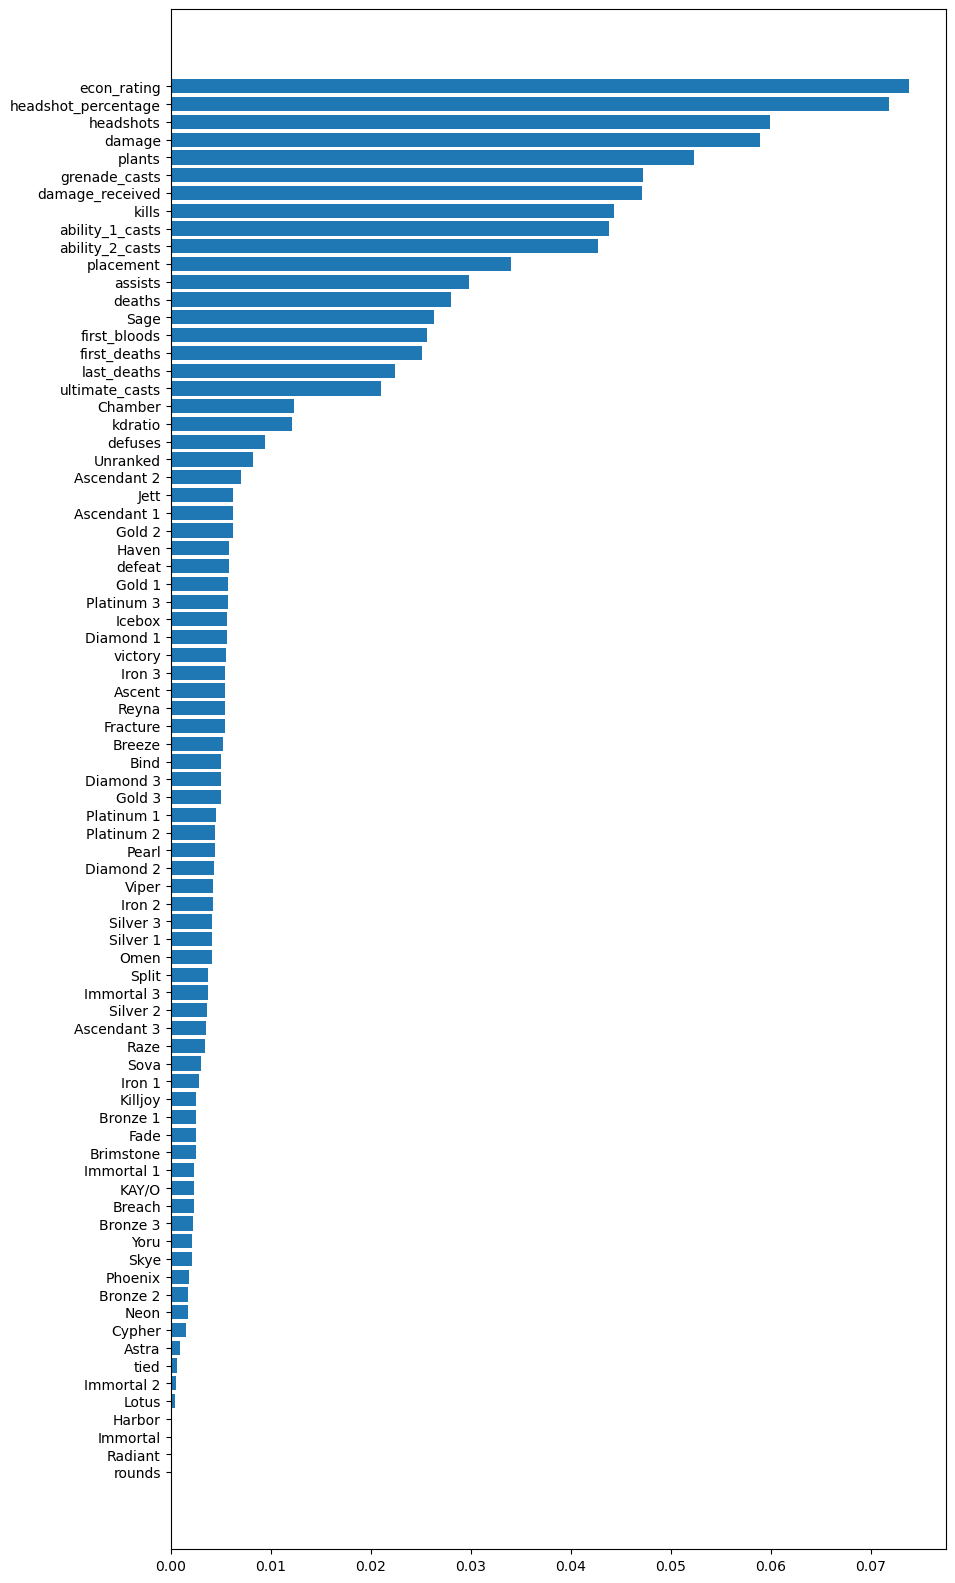

In [88]:
imp_df =  pd.DataFrame()
imp_df["feature"] = X_train.columns
imp_df["importance"] = rf.feature_importances_
imp_df_sorted = imp_df.sort_values(by=["importance"])
plt.figure(figsize=(10, 20))
plt.barh(imp_df_sorted["feature"], imp_df_sorted["importance"])

This plot is very interesting and provides some more insight on what attributes can be focused on to detect smurfs. Before it was assumed that kills, deaths and headshot percentage would be the most important traits for smurf detection but as we can see here 'econ_rating', 'damage_recieved', 'ability_1_casts' are also considered very important features. It is also interesting to see how different agent and ranks differ importance. 